In [230]:
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

Text(0.5, 1.0, 'Weights with Gaussian Kernel')

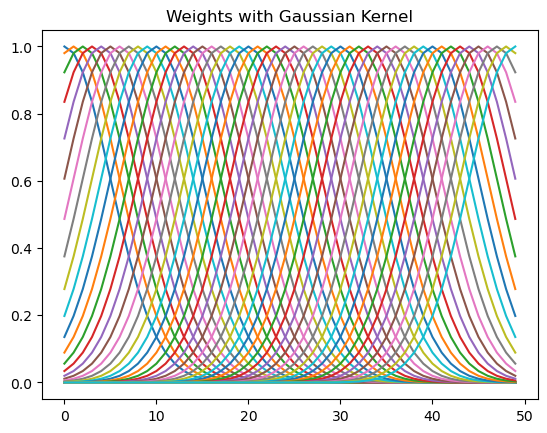

In [231]:
num_nodes = 50
num_time_steps = 10

w = np.zeros((num_nodes, num_nodes))
width = 0.2
for r in range(1, num_nodes + 1):
    for c in range(1, num_nodes + 1):
        w[r - 1][c - 1] = math.exp(-math.pow(r - c, 2) / 2 * math.pow(width, 2))

plt.plot(np.arange(num_nodes), w);
plt.title("Weights with Gaussian Kernel")

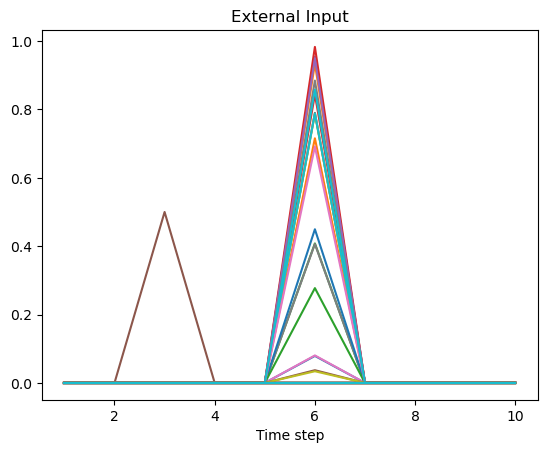

In [232]:
external_input = np.zeros((num_nodes, num_time_steps))
external_input[5, 2] = 0.5
external_input[20:40, 5] = np.random.default_rng().random(20)
plt.title("External Input")
plt.xlabel("Time step")
plt.plot(np.arange(1, 11), np.transpose(external_input));

In [233]:
# activity rate per neuron for t timesteps
U = np.zeros((num_nodes, num_time_steps))
print('t=1, initial neuron states\n')
print(U[:, 0], '\n')

t=1, initial neuron states

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 



In [236]:
tau = 1
mu = 2
def nn_ode(t, Uc, W, I, tau, mu):
    # Transpose W because our W[r,c] signifies the weight from neuron r to c
    # We want to add up the weighted connections to each neuron in Uc
    t = int(t)
    Oc = Uc**2 / (1 + mu * Uc.T.dot(Uc)) # global inhibition
    return (-Uc + W.T.dot(Oc) + I[:, t]) / tau

Oc = U[:, 0]
solution = sp.integrate.solve_ivp(nn_ode, [0, num_time_steps - 1], U[:, 0], t_eval=np.arange(0, num_time_steps), args=(w, external_input, tau, mu))
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [0 1 2 3 4 5 6 7 8 9]
        y: [[ 0.000e+00  0.000e+00 ...  1.217e-03  4.700e-04]
            [ 0.000e+00  0.000e+00 ...  1.449e-03  5.712e-04]
            ...
            [ 0.000e+00  0.000e+00 ...  1.024e-02  9.818e-03]
            [ 0.000e+00  0.000e+00 ...  6.817e-03  6.648e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 326
     njev: 0
      nlu: 0


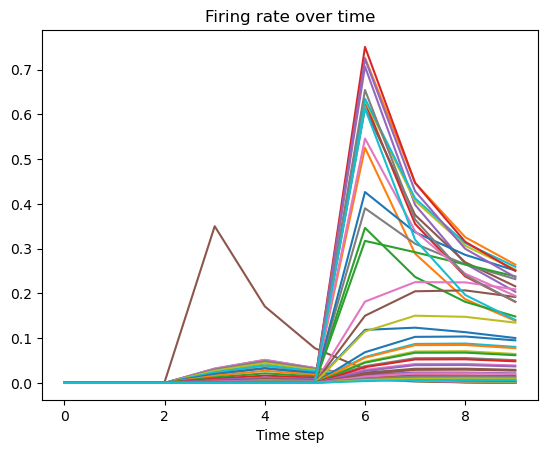

In [237]:
plt.title("Firing rate over time")
plt.xlabel("Time step")
plt.plot(solution.t, solution.y.T);